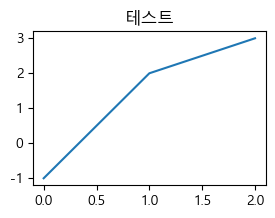

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


### 데이터프레임 생성

In [2]:
# ----------------------------
# 기상데이터 전체
#   df_all
# ---------------------------- 
file_path = 'data\기상데이터\기상데이터_전체.csv'
df_all = pd.read_csv(file_path, parse_dates=['일시'])
df_all

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10
...,...,...,...,...,...,...,...,...,...,...
1756507,296,북부산,2025-03-27,16.9,14.8,19.2,NaN,0.5,2025,3
1756508,296,북부산,2025-03-28,12.1,8.0,16.5,NaN,0.5,2025,3
1756509,296,북부산,2025-03-29,7.7,1.6,12.7,NaN,NaN,2025,3
1756510,296,북부산,2025-03-30,5.3,1.4,11.0,NaN,NaN,2025,3


In [3]:
# ----------------------------
# 지점정보
#   df_location
# ---------------------------- 
file_path = 'data\기상데이터\기상데이터_지점정보.csv'
df_location = pd.read_csv(file_path)
df_location

,지점,지점명,데이터수,시작년도,끝년도
0,159,부산,44187,1904,2025
1,112,인천,43698,1904,2025
2,165,목포,43585,1904,2025
3,143,대구,42810,1907,2025
4,108,서울,41936,1907,2025
...,...,...,...,...,...
100,116,관악산,2738,1983,1990
101,239,세종,2130,2019,2025
102,296,북부산,811,2023,2025
103,181,서청주,701,2023,2025


### 지점 입력받기


In [4]:
# --------------------
# 지점 입력받기
#   location_name
# --------------------
location_name = input("지점 입력받기 : ")


# --------------------
# 입력받은 지점의 정보 확인
# --------------------
cond = df_location['지점명'] == location_name
df_location.loc[cond]

,지점,지점명,데이터수,시작년도,끝년도
4,108,서울,41936,1907,2025


### 연도별 폭염 일수

In [5]:
# ---------------------------------------
# 입력한 지점의 폭염 데이터 선택
# 폭염의 기준 : 최고기온 33도 이상
#   df_hotday
# ---------------------------------------
cond1 = df_all['지점명'] == location_name
cond2 = df_all['최고기온(°C)'] >= 33

df_hotday = df_all.loc[cond1 & cond2]
df_hotday


,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
310,108,서울,1908-08-06,27.5,23.7,33.6,NaN,NaN,1908,8
322,108,서울,1908-08-18,25.6,20.3,33.3,NaN,NaN,1908,8
324,108,서울,1908-08-20,27.1,21.8,33.5,NaN,NaN,1908,8
673,108,서울,1909-08-04,26.4,21.1,33.2,NaN,0.0,1909,8
674,108,서울,1909-08-05,28.5,22.9,34.5,NaN,0.0,1909,8
...,...,...,...,...,...,...,...,...,...,...
1595767,108,서울,2024-09-09,28.5,24.1,34.1,NaN,NaN,2024,9
1595768,108,서울,2024-09-10,29.4,25.6,33.9,NaN,NaN,2024,9
1595769,108,서울,2024-09-11,29.0,25.4,34.6,0.4,0.4,2024,9
1595775,108,서울,2024-09-17,28.6,25.8,33.2,NaN,NaN,2024,9


In [6]:
# ---------------------------------------
# 연도별 폭염일수 요약
#   df_hotday_year
# ---------------------------------------
df_hotday_year = df_hotday.groupby('연도').size().to_frame()
df_hotday_year.columns = ['연도별 폭염일수']
df_hotday_year

,연도별 폭염일수
연도,
1908,3
1909,5
1910,1
1911,5
1912,3
...,...
2020,4
2021,18
2022,10


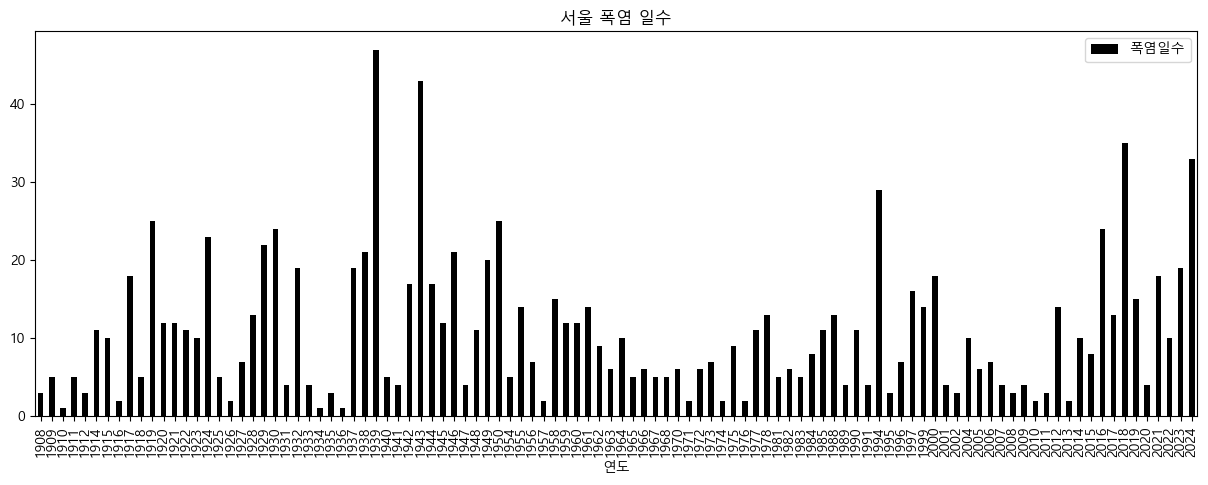

In [7]:
# ---------------------------------------
# 연도별 폭염일수 시각화
# ---------------------------------------
df_hotday_year.plot(kind='bar', title=f'{location_name} 폭염 일수', figsize=(15,5), color='black')
plt.legend(labels=["폭염일수"])
plt.xticks(rotation=90)
pass


### 연도별 열대야 일수

In [8]:
# ---------------------------------------
# 입력한 지점의 열대야 데이터 선택
# 열대야 기준 : 최저기온 25도 이상
#   df_hotnight
# ---------------------------------------

cond1 = df_all['지점명'] == location_name
cond2 = df_all['최저기온(°C)'] >= 25
df_hotnight = df_all.loc[cond1 & cond2, ['지점명','연도','일시','최저기온(°C)']]
df_hotnight

,지점명,연도,일시,최저기온(°C)
677,서울,1909,1909-08-08,25.3
678,서울,1909,1909-08-09,25.6
10357,서울,1910,1910-07-29,25.0
10359,서울,1910,1910-07-31,25.2
10736,서울,1911,1911-08-12,25.8
...,...,...,...,...
1595769,서울,2024,2024-09-11,25.4
1595772,서울,2024,2024-09-14,25.2
1595775,서울,2024,2024-09-17,25.8
1595776,서울,2024,2024-09-18,26.5


In [9]:
# ---------------------------------------
# 연도별 열대야일수 요약
#   df_hotnight_year
# ---------------------------------------
df_hotnight_year = df_hotnight.groupby('연도').size().to_frame()
df_hotnight_year.columns = ['열대야일수']
df_hotnight_year


,열대야일수
연도,
1909,2
1910,2
1911,1
1914,4
1915,3
...,...
2020,14
2021,20
2022,20


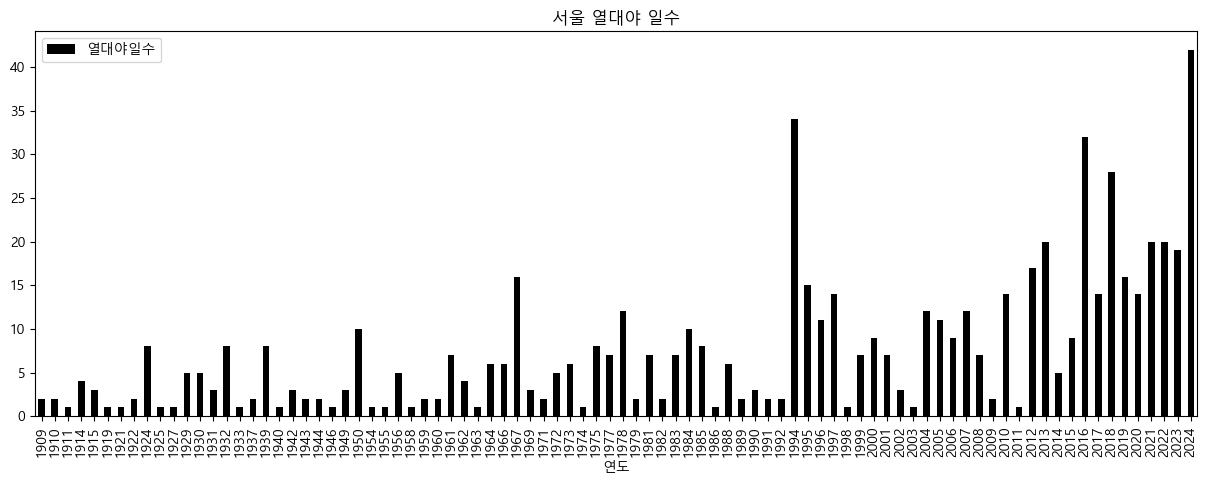

In [10]:
# ---------------------------------------
# 연도별 열대야 일수 시각화
# ---------------------------------------
df_hotnight_year.plot.bar(title=f'{location_name} 열대야 일수', color='black', figsize = (15, 5))
plt.xticks(rotation=90)
pass

In [11]:
df_hotday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
310,108,서울,1908-08-06,27.5,23.7,33.6,NaN,NaN,1908,8
322,108,서울,1908-08-18,25.6,20.3,33.3,NaN,NaN,1908,8
324,108,서울,1908-08-20,27.1,21.8,33.5,NaN,NaN,1908,8
673,108,서울,1909-08-04,26.4,21.1,33.2,NaN,0.0,1909,8
674,108,서울,1909-08-05,28.5,22.9,34.5,NaN,0.0,1909,8
...,...,...,...,...,...,...,...,...,...,...
1595767,108,서울,2024-09-09,28.5,24.1,34.1,NaN,NaN,2024,9
1595768,108,서울,2024-09-10,29.4,25.6,33.9,NaN,NaN,2024,9
1595769,108,서울,2024-09-11,29.0,25.4,34.6,0.4,0.4,2024,9
1595775,108,서울,2024-09-17,28.6,25.8,33.2,NaN,NaN,2024,9


### 연도별 가장 이른/늦은 폭염 열대야

In [12]:
# ---------------------------------------
# 가장 이른/늦은 폭염
#   df_hotday_early_late
# ---------------------------------------
df_hotday_early_late = df_hotday.groupby('연도')['일시'].agg(가장이른폭염일='min', 가장늦은폭염일 ='max')
df_hotday_early_late

,가장이른폭염일,가장늦은폭염일
연도,,
1908,1908-08-06,1908-08-20
1909,1909-08-04,1909-08-10
1910,1910-07-30,1910-07-30
1911,1911-08-09,1911-08-17
1912,1912-08-05,1912-08-11
...,...,...
2020,2020-06-13,2020-08-26
2021,2021-07-14,2021-08-09
2022,2022-07-02,2022-07-30


In [13]:
df_hotnight

,지점명,연도,일시,최저기온(°C)
677,서울,1909,1909-08-08,25.3
678,서울,1909,1909-08-09,25.6
10357,서울,1910,1910-07-29,25.0
10359,서울,1910,1910-07-31,25.2
10736,서울,1911,1911-08-12,25.8
...,...,...,...,...
1595769,서울,2024,2024-09-11,25.4
1595772,서울,2024,2024-09-14,25.2
1595775,서울,2024,2024-09-17,25.8
1595776,서울,2024,2024-09-18,26.5


In [14]:
# ---------------------------------------
# 가장 이른/늦은 열대야
#    df_hotnight_early_late
# ---------------------------------------
df_hotnight_early_late = df_hotnight.groupby('연도')['일시'].agg(가장이른열대야일='min', 가장늦은열대야일='max')
df_hotnight_early_late

,가장이른열대야일,가장늦은열대야일
연도,,
1909,1909-08-08,1909-08-09
1910,1910-07-29,1910-07-31
1911,1911-08-12,1911-08-12
1914,1914-07-26,1914-08-15
1915,1915-07-22,1915-07-29
...,...,...
2020,2020-08-04,2020-08-29
2021,2021-07-13,2021-08-06
2022,2022-06-27,2022-08-20


### 데이터프레임 통합
* 폭염일수, 열대야일수, 가장이른폭염일, 가장늦은폭염일, 가장이른열대야일, 가장늦은열대야일

In [15]:
df_hotday_year

,연도별 폭염일수
연도,
1908,3
1909,5
1910,1
1911,5
1912,3
...,...
2020,4
2021,18
2022,10


In [16]:
# ---------------------------------------------------------------------------------------
# 폭염일수, 열대야일수, 가장이른폭염일, 가장늦은폭염일, 가장이른열대야일, 가장늦은열대야일
#   df_hotdaynight
# ---------------------------------------------------------------------------------------
df_hotdaynight = pd.concat([df_hotday_year, df_hotnight_year, df_hotday_early_late, df_hotnight_early_late], axis = 1)
df_hotdaynight.rename(columns={'연도별 폭염일수' : '폭염일수'}, inplace=True)
df_hotdaynight.sort_index(ascending=True, inplace=True)
df_hotdaynight

,폭염일수,열대야일수,가장이른폭염일,가장늦은폭염일,가장이른열대야일,가장늦은열대야일
연도,,,,,,
1908,3.0,NaN,1908-08-06,1908-08-20,NaT,NaT
1909,5.0,2.0,1909-08-04,1909-08-10,1909-08-08,1909-08-09
1910,1.0,2.0,1910-07-30,1910-07-30,1910-07-29,1910-07-31
1911,5.0,1.0,1911-08-09,1911-08-17,1911-08-12,1911-08-12
1912,3.0,NaN,1912-08-05,1912-08-11,NaT,NaT
...,...,...,...,...,...,...
2020,4.0,14.0,2020-06-13,2020-08-26,2020-08-04,2020-08-29
2021,18.0,20.0,2021-07-14,2021-08-09,2021-07-13,2021-08-06
2022,10.0,20.0,2022-07-02,2022-07-30,2022-06-27,2022-08-20


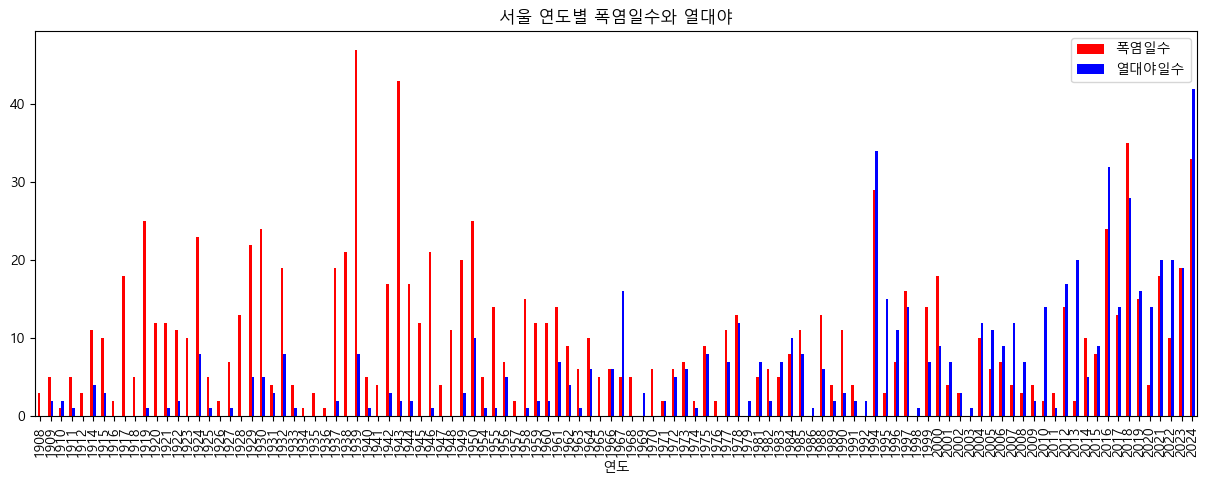

In [17]:
df_hotdaynight.loc[:, '폭염일수' : '열대야일수'].plot.bar(title=f'{location_name} 연도별 폭염일수와 열대야', color=['red', 'blue'], figsize=(15, 5))
plt.xticks(rotation=90)
pass

In [18]:
#지점별 폭염과 열대야 일수
cond = df_all['최고기온(°C)'] >= 33
df_heatwave = df_all[cond].copy()
df_heatwave
cond1 = df_all['최저기온(°C)'] >= 25
df_tropical = df_all[cond1].copy()
df_tropical

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
677,108,서울,1909-08-08,29.5,25.3,35.6,NaN,NaN,1909,8
678,108,서울,1909-08-09,29.7,25.6,34.8,NaN,0.0,1909,8
943,112,인천,1904-08-08,26.7,25.6,29.1,NaN,0.9,1904,8
3193,143,대구,1908-07-31,NaN,25.2,35.0,NaN,NaN,1908,7
3194,143,대구,1908-08-05,NaN,26.0,37.8,NaN,NaN,1908,8
...,...,...,...,...,...,...,...,...,...,...
1756314,296,북부산,2024-09-15,29.0,27.1,31.8,0.0,0.0,2024,9
1756315,296,북부산,2024-09-16,28.0,26.1,31.9,NaN,0.0,2024,9
1756316,296,북부산,2024-09-17,29.9,25.5,35.0,NaN,NaN,2024,9
1756317,296,북부산,2024-09-18,30.1,26.0,35.7,NaN,NaN,2024,9


In [19]:
df_heatwave['지점명'].value_counts().sort_index(ascending=True)


지점명
강릉     1307
강진군     199
강화      178
거제      339
거창      649
       ... 
합천     1078
해남      414
홍성      130
홍천      788
흑산도      38
Name: count, Length: 103, dtype: int64

In [22]:
df_heatwave_days = df_heatwave.groupby('지점명').size().to_frame()

df_heatwave_days.columns = ['지역별 폭염일수']
df_heatwave_days

,지역별 폭염일수
지점명,
강릉,1307
강진군,199
강화,178
거제,339
거창,649
...,...
합천,1078
해남,414
홍성,130


In [23]:
df_tropical_days = df_tropical.groupby('지점명').size().to_frame()

df_tropical_days.columns = ['지역별 열대야일수']
df_tropical_days

,지역별 열대야일수
지점명,
강릉,774
강진군,154
강화,80
거제,547
거창,3
...,...
합천,132
해남,324
홍성,78


In [25]:
df_location_heattropical = pd.concat([df_heatwave_days, df_tropical_days], axis=1)
df_location_heattropical

,지역별 폭염일수,지역별 열대야일수
지점명,,
강릉,1307,774.0
강진군,199,154.0
강화,178,80.0
거제,339,547.0
거창,649,3.0
...,...,...
합천,1078,132.0
해남,414,324.0
홍성,130,78.0


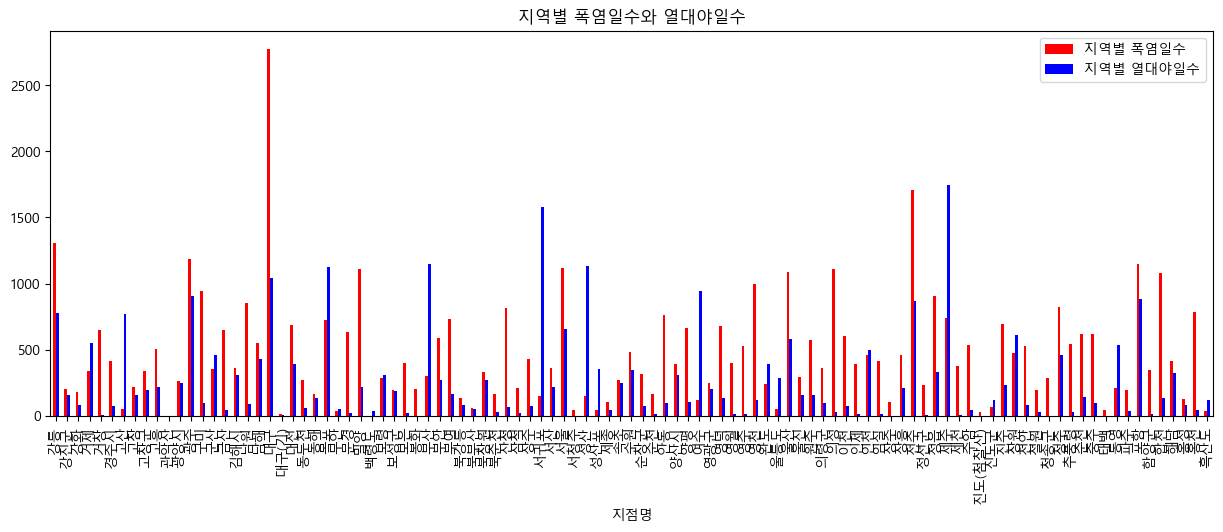

In [29]:
df_location_heattropical.plot.bar(title='지역별 폭염일수와 열대야일수', figsize=(15, 5), color=['red', 'blue'])
plt.xticks(rotation=90)
pass

# 폭염과 열대야 사이의 관계에 대한 분석
* 폭염

    일반적으로 낮 최고기온이 33℃ 이상인 날.
    한반도에서는 여름철 강한 일사와 대기 정체로 발생.

* 열대야

    밤 최저기온이 25℃ 이상인 날.
    낮 동안 축적된 열이 밤에도 식지 못해 나타남.

폭염은 열대야를 유발하는 경향이 있다.

